### Load Libraries + Data

In [1]:
# load in appropriate libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load in the final data set
df = pd.read_csv('../data/cleaned_data/FINAL_DATA.csv')

# create new grading variables
### SCA Grading ###
df['sca_grade'] = np.where(
    (df['Category.One.Defects'] == 0) & (df['Category.Two.Defects'] + df['Quakers'] <= 5), 'Specialty',
    np.where(
        (df['Category.One.Defects'] == 0) & (df['Category.Two.Defects'] + df['Quakers'] <= 8), 'Premium',
        np.where(
            (df['Category.One.Defects'] <= 5) & (df['Category.Two.Defects'] + df['Quakers'] <= 15), 'Exchange',
            'Bad'
        )
    )
)

print(df['sca_grade'].value_counts())
### Market Grading ###
df.columns

df['total_score'] = df['Aroma'] + df['Flavor'] + df['Aftertaste'] + df['Acidity'] + df['Body'] + df['Balance'] + df['Uniformity'] + df['Clean.Cup'] + df['Sweetness']
df['market_grade'] = pd.cut(df['total_score'], bins = [0, 70, 75, 78, 90],
                            labels = ['Normal', 'Gourmet', 'Premium', 'Specialty'])

print(df['market_grade'].value_counts())

sca_grade
Specialty    354
Exchange      21
Premium       19
Bad            8
Name: count, dtype: int64
market_grade
Premium      253
Gourmet       98
Specialty     48
Normal         3
Name: count, dtype: int64


### Univariate Visualizations

In [3]:
px.bar(df, x = 'Country.of.Origin')

In [4]:
px.histogram(df, x='Number.of.Bags')

In [5]:
px.histogram(df, x = 'Bag.Weight')

In [6]:
px.histogram(df, x = 'Harvest.Year')

In [7]:
px.bar(df, x = 'Processing.Method')

In [8]:
px.histogram(df, x = 'Moisture')

In [9]:
px.histogram(df, x = 'Category.One.Defects')

In [10]:
px.histogram(df, 'Quakers')

In [11]:
px.bar(df, x = 'Color')

In [12]:
px.histogram(df, x = 'Category.Two.Defects')

In [13]:
px.histogram(df, x = 'Altitude')

In [14]:
px.bar(df, x = 'Species')

### Bivariate Visualizations

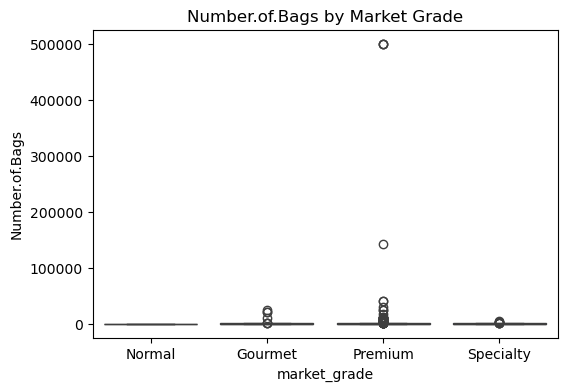

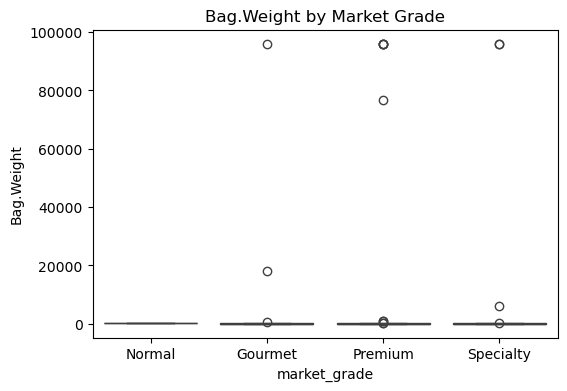

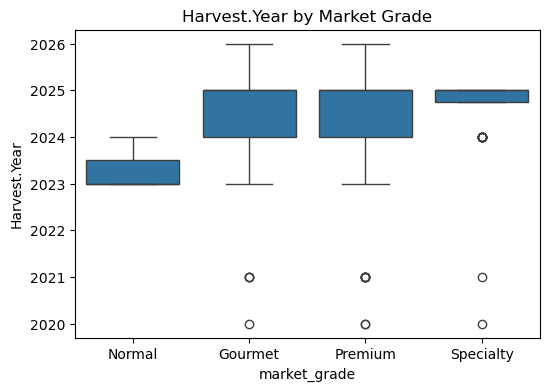

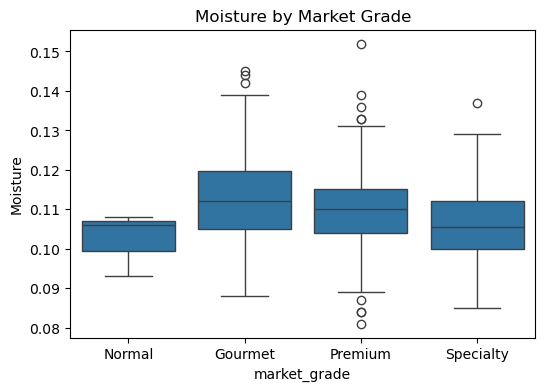

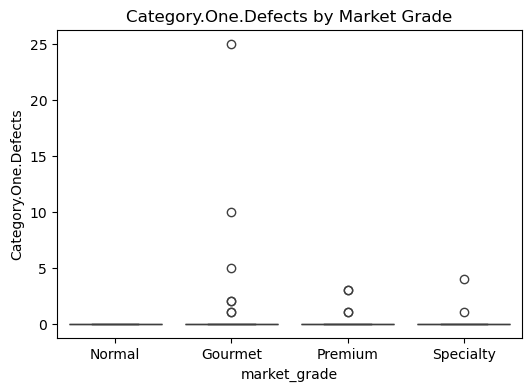

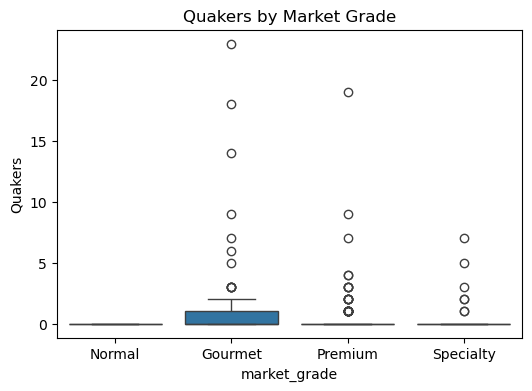

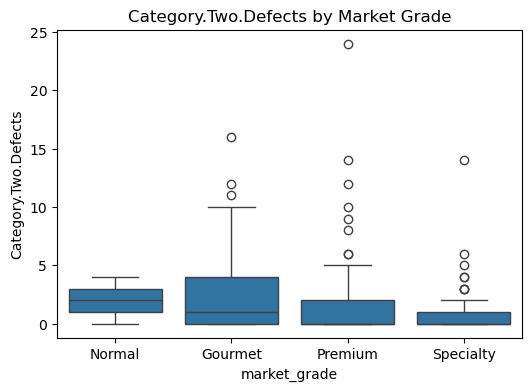

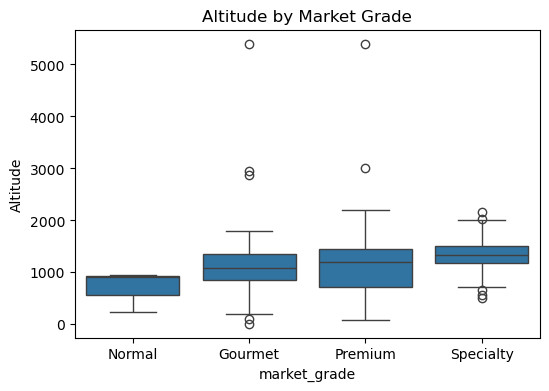

In [15]:
numeric_vars = ['Number.of.Bags', 'Bag.Weight', 'Harvest.Year', 'Moisture', 'Category.One.Defects',
                'Quakers', 'Category.Two.Defects', 'Altitude']
for var in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='market_grade', y=var, data=df)
    plt.title(f'{var} by Market Grade')
    plt.show()

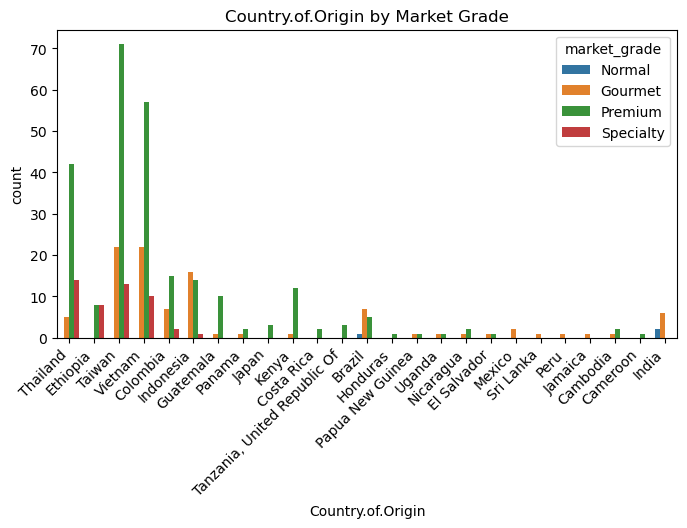

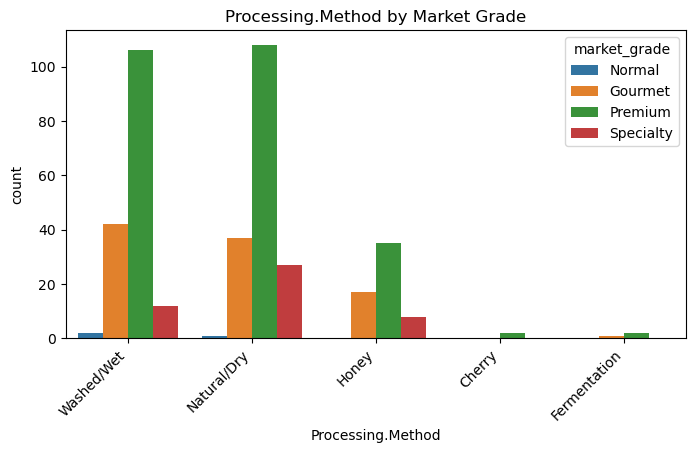

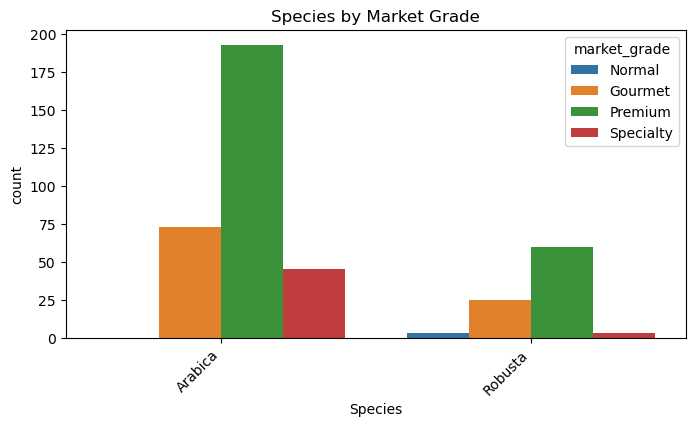

In [16]:
categorical_vars = ['Country.of.Origin', 'Processing.Method', 'Species']
for var in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(x=var, hue='market_grade', data=df)
    plt.title(f'{var} by Market Grade')
    plt.xticks(rotation=45, ha='right')
    plt.show()


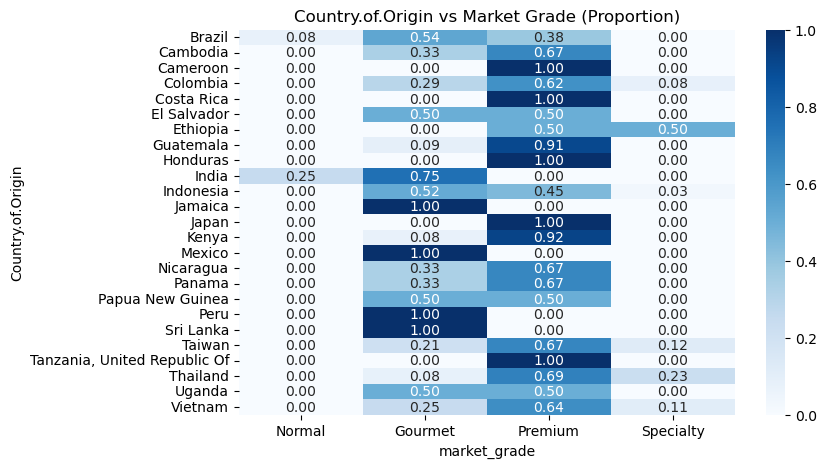

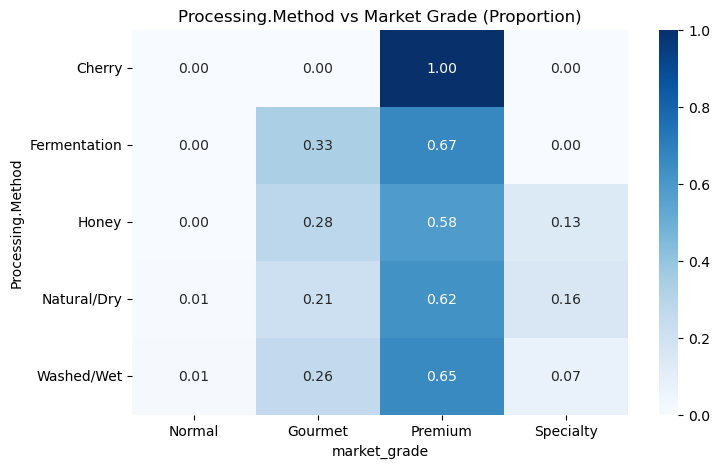

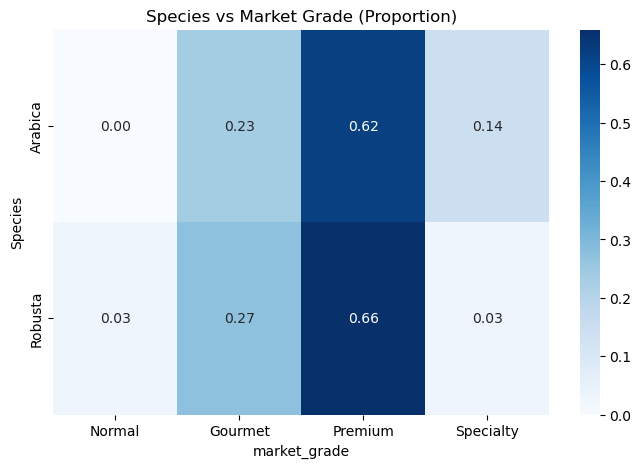

In [17]:
for var in categorical_vars:
    cross_tab = pd.crosstab(df[var], df['market_grade'], normalize='index')
    plt.figure(figsize=(8,5))
    sns.heatmap(cross_tab, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f'{var} vs Market Grade (Proportion)')
    plt.show()


### Final Notes

Based on the EDA done for the MLP model, it appears that there might be some outliers preset in Bag Weight and Number of Bags (since some of the values are quite high).

In general, it appears that the numeric variables are either approximately normally distributed, or have a sever right skew.

In general, for categorical variables, it appears there are differences in the proportions between a categorical variable and market grade.

Based on the EDA, it appears that the next course of action will be to remove any outliers (if they are outliers) and then normalize all of the numeric variables and one-hot encode the categorical ones.